In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv');
data.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.0

data_train = data[1000:m].T
X_train = data_train[1:n] / 255.0
Y_train = data_train[0]

In [4]:
Y_train.shape

(41000,)

In [5]:
X_train[:, 0].shape

(784,)

In [6]:
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(1. / 784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(1. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp / np.sum(exp, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.09)

Iteration:  0
Accuracy:  0.12529268292682927
Iteration:  10
Accuracy:  0.22495121951219513
Iteration:  20
Accuracy:  0.2727317073170732
Iteration:  30
Accuracy:  0.3681219512195122
Iteration:  40
Accuracy:  0.45539024390243904
Iteration:  50
Accuracy:  0.5278780487804878
Iteration:  60
Accuracy:  0.6036585365853658
Iteration:  70
Accuracy:  0.684
Iteration:  80
Accuracy:  0.7275853658536585
Iteration:  90
Accuracy:  0.756780487804878
Iteration:  100
Accuracy:  0.7833170731707317
Iteration:  110
Accuracy:  0.8028780487804879
Iteration:  120
Accuracy:  0.8166829268292682
Iteration:  130
Accuracy:  0.8286341463414634
Iteration:  140
Accuracy:  0.8365121951219512
Iteration:  150
Accuracy:  0.8435853658536585
Iteration:  160
Accuracy:  0.8493414634146341
Iteration:  170
Accuracy:  0.8536585365853658
Iteration:  180
Accuracy:  0.8578292682926829
Iteration:  190
Accuracy:  0.8619756097560975
Iteration:  200
Accuracy:  0.8651707317073171
Iteration:  210
Accuracy:  0.8688780487804878
Iteration:

Prediction:  [6]
Label:  6


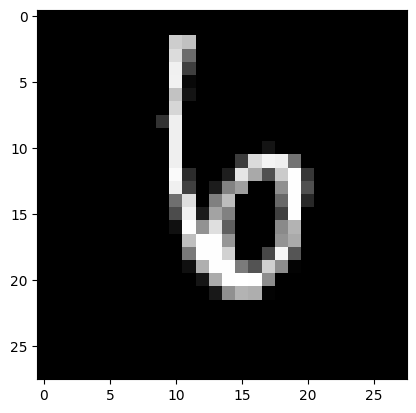

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 100
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(150, W1, b1, W2, b2)

